# Intro to Data Structures: Ace the Technical Interview

## Session 6: Trees, Binary Trees, Binary Search Tree

### Agenda for Today:


*   Node Creation
*   BST Creation + Insertion
*   Traversal
*   Practice Question: Search an item from a Binary Search Tree





---



---



#### Node Creation:

Implement a `Node` class which has the follwing attributes
* `data` contains the data
* `left` pointer that points to the left subtree
* `right` pointer that points to the right subtree

* Initialize `data`, `left` and `right` in initializer. Both `left` and `right` has default value of `None`.
* Implement `__str__()` method to return string with format `Node(data, left.data, right.data)`

In [ ]:
# Create a Class (a template) to represent an Element or Node of a Tree

class Node:
  def __init__(self,data,left=None,right=None):
    self.left = left
    self.data = data         # stores the value of the element/node
    self.right = right        # stores a reference/pointer to the next node

  def __str__(self):
      toReturn="Node(data:{},left:{},right:{})".format(self.data,self.left.data if self.left else None,self.right.data if self.right else None)
      return toReturn

In [ ]:
l = Node(5)
r = Node(15)
n1 = Node(10, l, r)
print(n1)
print(n1.left)

Node(data:10,left:5,right:15)
Node(data:5,left:None,right:None)


#### BST Creation + Insertion:

Implement a class BinarySearchTree.

It has a root attribute pointing to its root node.
Define an `add()` method to add a val to the tree.

The operation to insert a value is a recursive process at each node of the tree. 
* First we compare with the root node.
* If root node is a None, put it in root node.
* If the value is greater then the root node, recurse into right subtree.
* If the value is less than the root node, recurse into left subtree.
* Recurse until it reach a leaf node with None value, and add the node to the tree.

In [ ]:
class BinarySearchTree:
    def __init__(self,root=None):
        self.root=root
        
    def insert(self,root,val):
        if val<root.data:                                 # the value is less than current data
            if root.left==None:                           # if there is no value in the left subtree
                root.left=Node(val)                       # insert new value into left subtree
            else:
                self.insert(root.left,val)                # recurse into left subtree
        else:                                             # the value is more than current data or equals to
            if root.right==None:                          # if there is no value in the right subtree
                root.right=Node(val)                      # insert new value into right subtree
            else:
                self.insert(self.root.right,val)          # insert new value into right subtree

    def add(self,val):
        if self.root==None:
            self.root=Node(val)
        else:
            self.insert(self.root,val)
    
    
                
t = BinarySearchTree()
t.add(10)
t.add(5)
t.add(15)
t.add(1)
print(t.root)
print(t.root.left)
print(t.root.right)

Node(data:10,left:5,right:15)
Node(data:5,left:1,right:None)
Node(data:15,left:None,right:None)




---



---



#### Traversal:

Define an `inorder` method that perform an in-order traversal of the tree 

[In-order Traversal ](https://leetcode.com/problems/binary-tree-inorder-traversal/)
* Traverse the left subtree
* Visit the root.
* Traverse the right subtree

In-order traversal gives nodes in increasing order.

In [ ]:
# Time:  O(n)
# Space: O(1)

class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def inorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        result, curr = [], root
        while curr:
            if curr.left is None:
                result.append(curr.val)
                curr = curr.right
            else:
                node = curr.left
                while node.right and node.right != curr:
                    node = node.right

                if node.right is None:
                    node.right = curr
                    curr = curr.left
                else:
                    result.append(curr.val)
                    node.right = None
                    curr = curr.right

        return result

Define a `preorder` method that perform a pre-order traversal of the tree 

[Pre-order Traversal ](https://https://leetcode.com/problems/binary-tree-preorder-traversal/)
* Visit the root.
* Traverse the left subtree
* Traverse the right subtree

Pre-order traversal is used to create a copy of the tree 

In [ ]:
# Time:  O(n)
# Space: O(1)

class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


# Solution1
class Solution(object):
    def preorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        result, curr = [], root
        while curr:
            if curr.left is None:
                result.append(curr.val)
                curr = curr.right
            else:
                node = curr.left
                while node.right and node.right != curr:
                    node = node.right

                if node.right is None:
                    result.append(curr.val)
                    node.right = curr
                    curr = curr.left
                else:
                    node.right = None
                    curr = curr.right

        return result

10
5
1
7
15
12
17


In [ ]:
# Time:  O(n)
# Space: O(h)

class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

# Solution2
class Solution2(object):
    def preorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        result, stack = [], [(root, False)]
        while stack:
            root, is_visited = stack.pop()
            if root is None:
                continue
            if is_visited:
                result.append(root.val)
            else:
                stack.append((root.right, False))
                stack.append((root.left, False))
                stack.append((root, True))
        return result

Define a `postorder` method that perform a preorder traversal of the tree 

[Postorder Traversal ](https://leetcode.com/problems/binary-tree-postorder-traversal/)
* Traverse the left subtree
* Traverse the right subtree
* Visit the root

Postorder traversal is used to delete the tree 

In [ ]:
# Time:  O(n)
# Space: O(1)

class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def postorderTraversal(self, root):
        """
        :type root: TreeNode
        :rtype: List[int]
        """
        dummy = TreeNode(0)
        dummy.left = root
        result, cur = [], dummy
        while cur:
            if cur.left is None:
                cur = cur.right
            else:
                node = cur.left
                while node.right and node.right != cur:
                    node = node.right

                if node.right is None:
                    node.right = cur
                    cur = cur.left
                else:
                    result += self.traceBack(cur.left, node)
                    node.right = None
                    cur = cur.right

        return result

    def traceBack(self, frm, to):
        result, cur = [], frm
        while cur is not to:
            result.append(cur.val)
            cur = cur.right
        result.append(to.val)
        result.reverse()
        return result

1
7
5
12
20
17
15
10




---



---



### [Practice Question: Search an item from a Binary Search Tree](https://leetcode.com/problems/search-in-a-binary-search-tree/)

You are given the **root** of a binary search tree (BST) and an integer **val**.

Find the node in the BST that the node's value equals **val** and return the subtree rooted with that node. If such a node does not exist, return null.

Example:

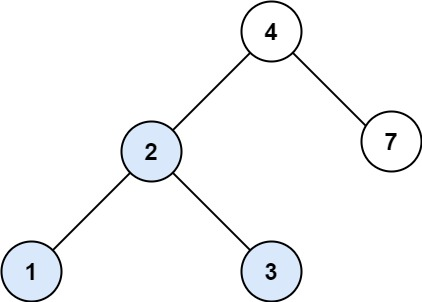

Input: root = [4,2,7,1,3], val = 2

Output: [2,1,3]

In [ ]:
# The task is to search a given value in Binary Search Tree

# TIPS:
# If the value is present at root, we return the root.
# If the value is greater than root’s value, we recurse into the right subtree of root node.
# Otherwise we recurse in the left subtree.

In [ ]:
class BinarySearchTree:
    def __init__(self,root=None):
        self.root=root
        
# Recursive function to insert a key into a BST
def insert(root, key):

    # if the root is None, create a new node and return it
    if root is None:
        return Node(key)

    # if the given key is less than the root node, recur for the left subtree
    if key < root.data:
        root.left = insert(root.left, key)

    # if the given key is more than the root node, recur for the right subtree
    else:
        root.right = insert(root.right, key)

    return root


# Recursive function to search in a given BST
def search(root, key, parent):

    # if the key is not present in the key
    if root is None:
        print("Key Not found")
        return

    # if the key is found
    if root.data == key:

        if parent is None:
            print("The node with key", key, "is root node")
        elif key < parent.data:
            print("The given key is the left node of the node with key", parent.data)
        else:
            print("The given key is the right node of the node with key", parent.data)

        return

    # if the given key is less than the root node, recur for the left subtree;
    # otherwise, recur for the right subtree

    if key < root.data:
        search(root.left, key, root)
    else:
        search(root.right, key, root)
            
if __name__ == '__main__':
 
    keys = [15, 10, 20, 8, 12, 16, 25]
 
    root = None
    for key in keys:
        root = insert(root, key)
 
    search(root, 8, None)

NameError: ignored

In [ ]:
#Leetcode Solution

# Time:  O(logn)
# Space: O(1)

class Solution(object):
    def search(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: int
        """
        left, right = 0, len(nums)-1
        while left <= right:
            mid = left + (right-left)//2
            if nums[mid] > target:
                right = mid-1
            elif nums[mid] < target:
                left = mid+1
            else:
                return mid
        return -1

#### Interview Questions & Further Reading:



1.   [Interview questions related to BST](https://www.techiedelight.com/binary-search-tree-bst-interview-questions/)
2.   [Most common Binary Tree Interview Questions & Answers](https://www.upgrad.com/blog/binary-tree-interview-questions-answers/)
3.   [Binary Tree Interview Practice](https://medium.com/techie-delight/binary-tree-interview-questions-and-practice-problems-439df7e5ea1f)


